In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.read_csv('/Users/rgottumukkal/Downloads/2.14.1 Obtaining the Efficient Frontier in Python - Part I/Markowitz_Data.csv', index_col = 'Date')

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


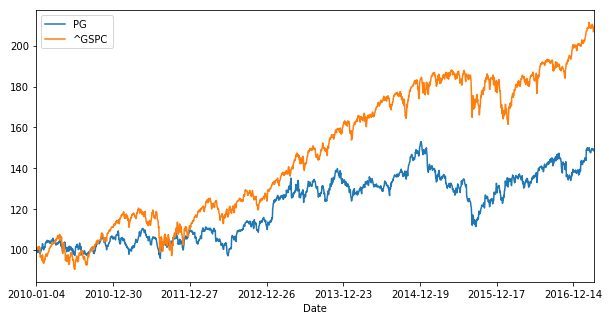

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250
log_returns.cov() * 250
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [8]:
num_assets = len(assets)
num_assets

2

In [9]:
arr = np.random.random(2)
arr

array([ 0.65737409,  0.59332952])

In [10]:
arr[0] + arr[1]

1.2507036149555029

In [11]:
weights = np.random.random(num_assets)
#code for making sum of two random numbers always equals 1.0
weights /= np.sum(weights)
weights

array([ 0.13756654,  0.86243346])

In [12]:
weights[0] + weights[1]

1.0

In [13]:
#expected portfolio return
np.sum(weights*log_returns.mean()) * 250

0.09365832867970376

In [16]:
#expected portfoilio variance
np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))

0.020756575834042744

In [17]:
#expected portfolio volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.14407142615398358

In [18]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.08225291,  0.08550339,  0.08094291,  0.06598365,  0.07795179,
         0.07433691,  0.07296731,  0.07981576,  0.08521865,  0.07767279,
         0.09879334,  0.0788032 ,  0.08132614,  0.07711639,  0.0908963 ,
         0.08009571,  0.06587482,  0.07126646,  0.08121971,  0.08485001,
         0.07466359,  0.08375682,  0.07099284,  0.08233813,  0.072779  ,
         0.06710221,  0.05873184,  0.0818605 ,  0.08669644,  0.09905973,
         0.05476902,  0.0959009 ,  0.09232519,  0.0803756 ,  0.08946463,
         0.0832551 ,  0.07361393,  0.07505808,  0.0920896 ,  0.07453498,
         0.07590718,  0.06136468,  0.0781339 ,  0.09431313,  0.07610128,
         0.07464173,  0.08878095,  0.07097154,  0.06995372,  0.06313284,
         0.07673987,  0.0636509 ,  0.06799257,  0.05794587,  0.07583022,
         0.0851714 ,  0.08050509,  0.05597029,  0.09883606,  0.07929623,
         0.07757678,  0.07637657,  0.09910076,  0.08509678,  0.05777688,
         0.08084743,  0.05785712,  0.08805113,  0.0

In [21]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'volatility':pfolio_volatilities })

In [23]:
portfolios.tail()

,Return,volatility
995,0.054635,0.142443
996,0.098358,0.150522
997,0.079827,0.132150
998,0.081448,0.132936
999,0.077259,0.131264


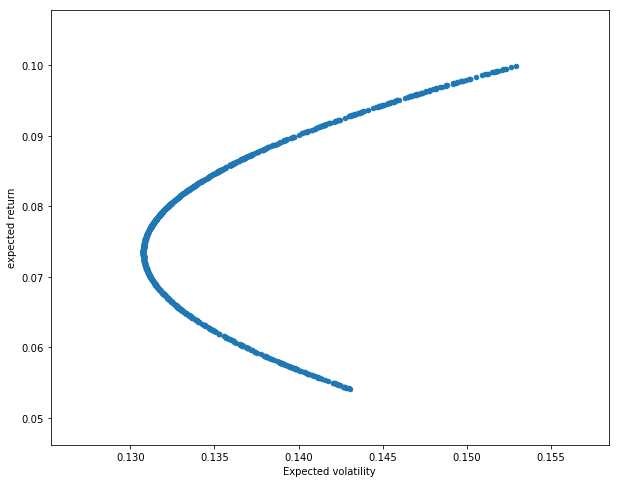

In [26]:
portfolios.plot(x='volatility', y='Return', kind = 'scatter',figsize=(10,8));
plt.xlabel('Expected volatility')
plt.ylabel('expected return')